In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Step 1: Extract - Load the dataset**

In [2]:
data_url = "https://drive.google.com/uc?id=10sofXyF6NjwN6ngLyFfiPI-CUDpeqaN_"
sales_data = pd.read_csv(data_url)

In [4]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# **Step 2: Transform**

In [8]:
# Convert 'Order Date' column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [9]:
# Extract year and month from the 'Date' column
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

# **Step 3: Load (optional, as we can perform analysis directly on the transformed data)**

### Now, let's perform the analysis:

In [11]:
# Sales trend month-wise
monthly_sales = sales_data.groupby('Month')['Total Revenue'].sum()

In [12]:
# Sales trend year-wise
yearly_sales = sales_data.groupby('Year')['Total Revenue'].sum()

In [13]:
# Sales trend yearly-month-wise
yearly_monthly_sales = sales_data.groupby(['Year', 'Month'])['Total Revenue'].sum()

In [14]:
# Key metrics and factors - you can explore various metrics like total sales, average sales, max sales, etc.
# Let's calculate total sales and average sales per month
total_sales_per_month = sales_data.groupby('Month')['Total Revenue'].sum()
average_sales_per_month = sales_data.groupby('Month')['Total Revenue'].mean()

In [34]:
# Relationship between attributes - you can explore correlations between different attributes
correlation_matrix = sales_data[['Total Revenue', 'Total Cost', 'Total Profit']].corr()

In [36]:
print(correlation_matrix)

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


### Display the results

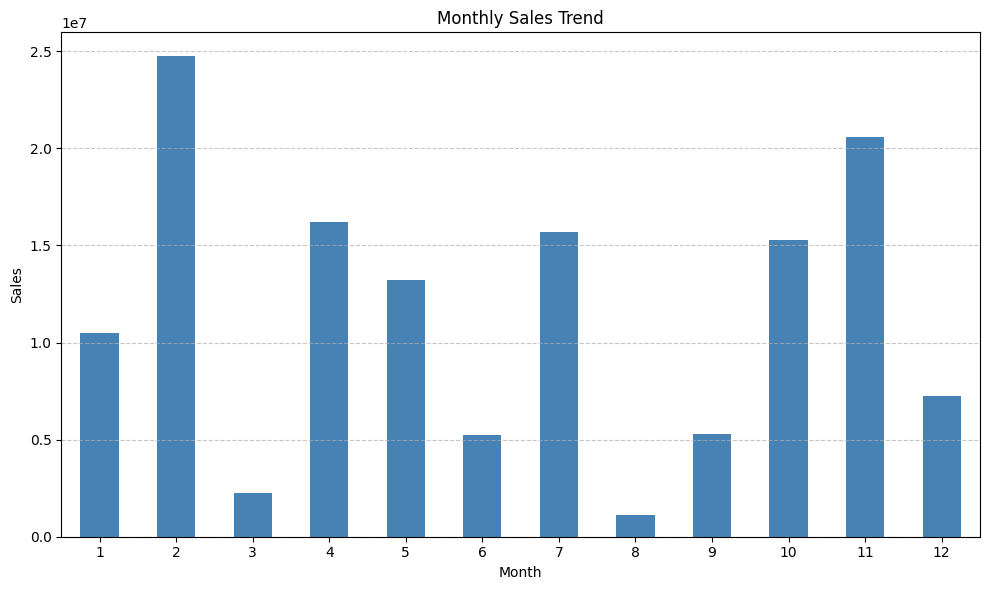

In [29]:
# Plotting the sales trend month-wise
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='steelblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

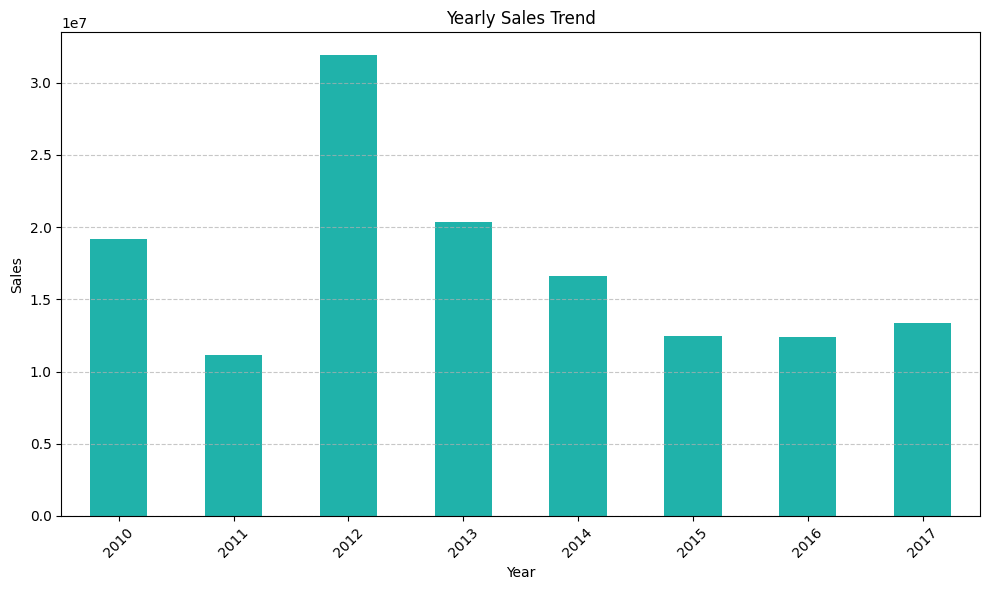

In [28]:
# Plotting the sales trend year-wise
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='lightseagreen')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

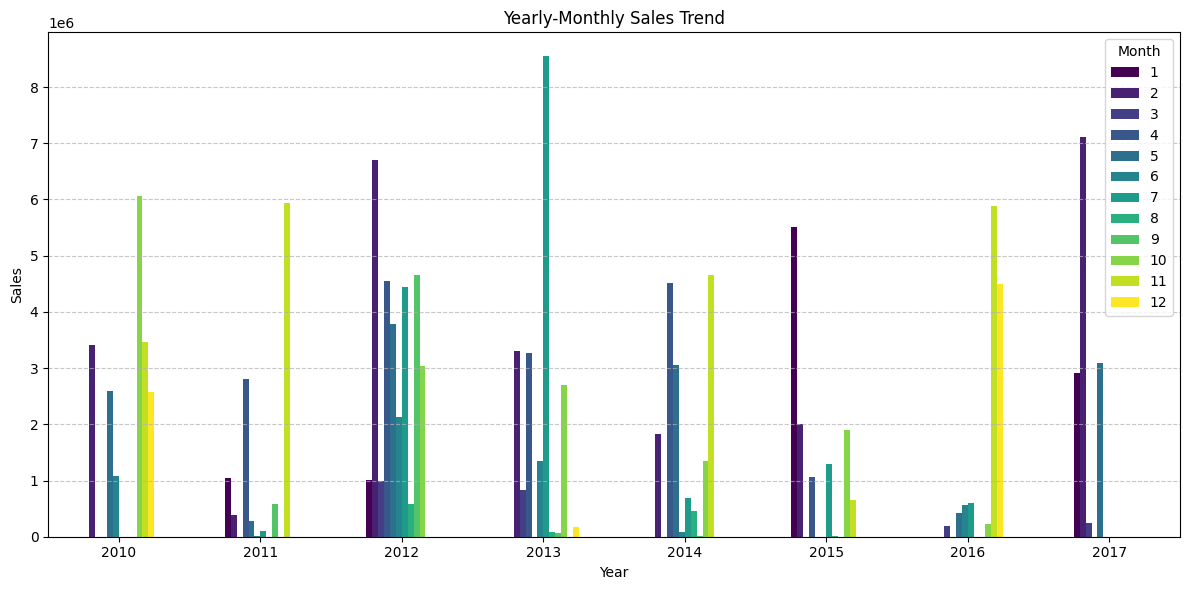

In [19]:
# Plotting the sales trend yearly-month-wise
yearly_monthly_sales.unstack().plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

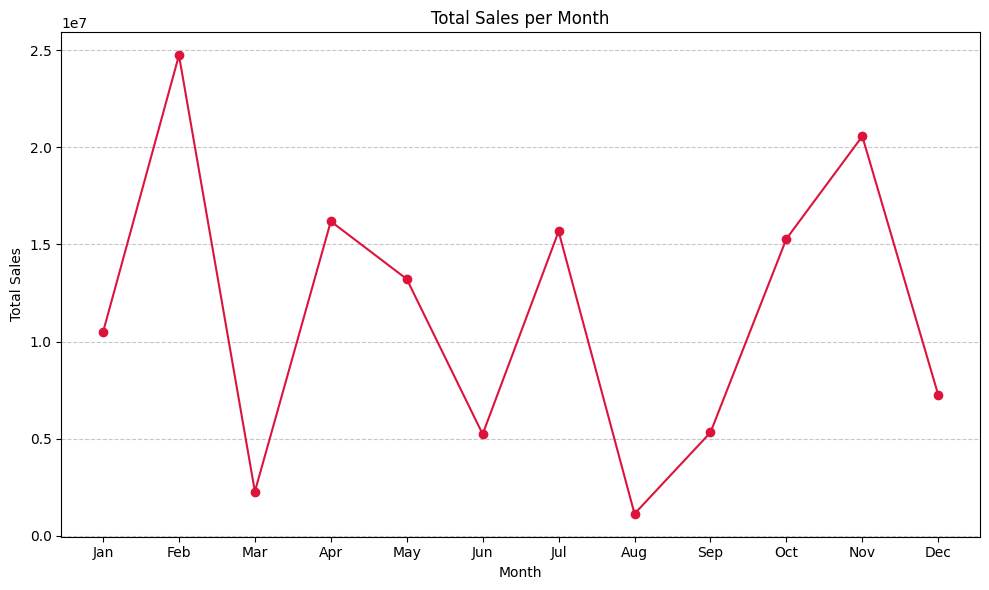

In [30]:
# Plotting total sales per month
plt.figure(figsize=(10, 6))
total_sales_per_month.plot(kind='line', marker='o', color='crimson')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

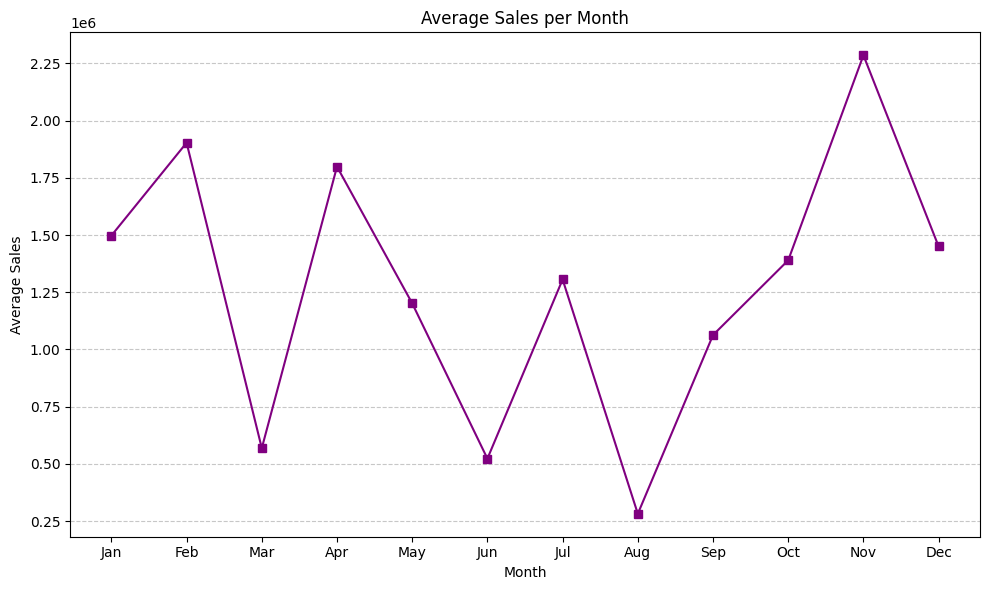

In [21]:
# Plotting average sales per month
plt.figure(figsize=(10, 6))
average_sales_per_month.plot(kind='line', marker='s', color='purple')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

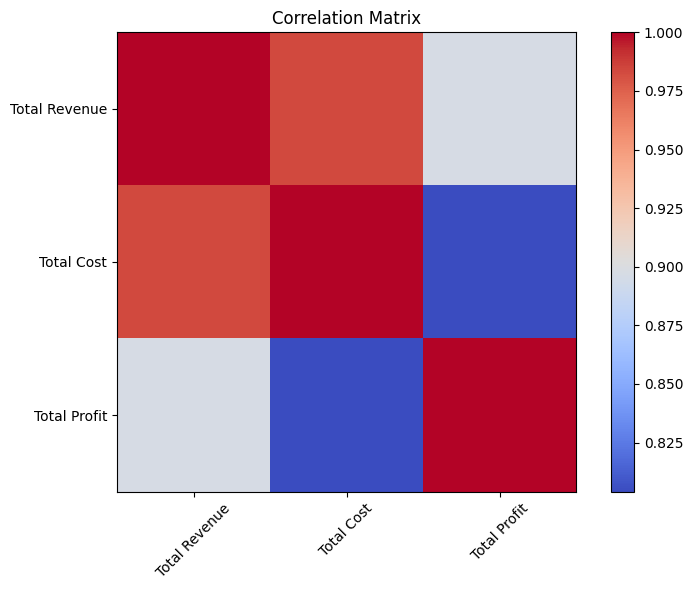

In [32]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.tight_layout()
plt.show()